## Predicting House Prices with Linear Regression
##### This project aims to predict house prices using a Linear Regression model based on various property features. 
##### The dataset includes attributes such as area, number of bedrooms, amenities, and more.

### Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

### Loading the Dataset

In [67]:
housing_dataset=pd.read_csv(r'/Users/daniellaiwagoh/Downloads/Housing.csv')

### Exploring the Dataset

In [69]:
housing_dataset.shape

(545, 13)

In [71]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [73]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [75]:
housing_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [77]:
housing_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [79]:
print(housing_dataset.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


### Handling Categorical Variables


In [81]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

### Encoding binary categorical columns

In [83]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    housing_dataset[col] = housing_dataset[col].map({'yes': 1, 'no': 0})

### Encoding furnishing status column

In [85]:
housing_dataset['furnishingstatus'] = housing_dataset['furnishingstatus'].map({'furnished': 1, 'unfurnished': 0})


In [87]:
print(housing_dataset.dtypes)


price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object


In [89]:
numeric_data = housing_dataset.select_dtypes(include=[np.number])


### Data Visualization-Heatmap

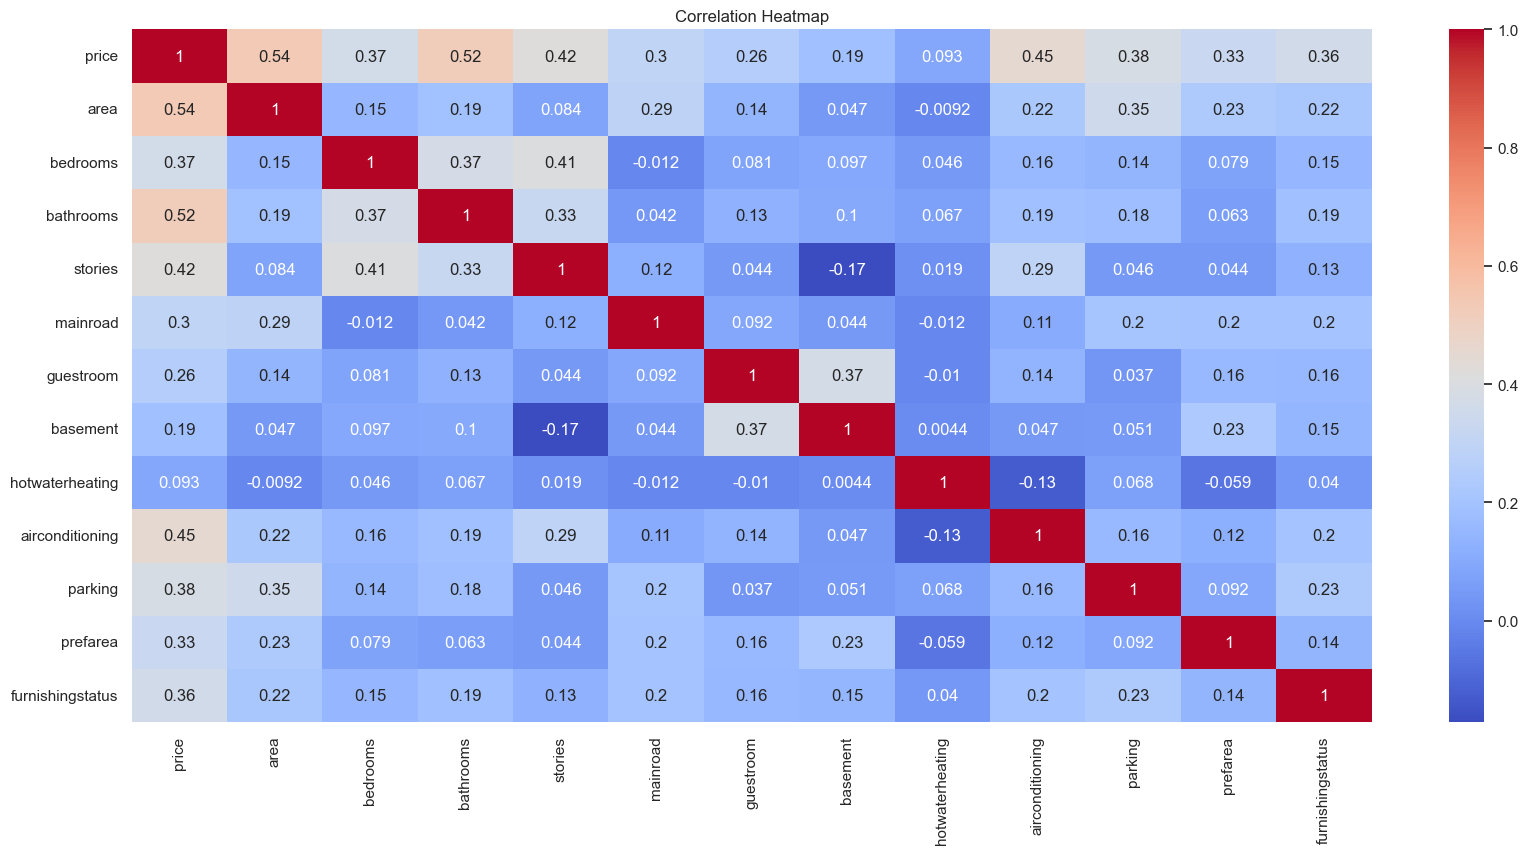

In [91]:
plt.figure(figsize=(20, 9))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Splitting Data into Training and Testing Sets

In [93]:
X = housing_dataset.drop('price', axis=1)

In [95]:
Y = housing_dataset['price']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

### Handling Missing Values

In [101]:
imputer = SimpleImputer(strategy='median')


In [103]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


### Model Training

In [99]:
model = LinearRegression()

In [105]:
model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [107]:
Y_pred = model.predict(X_test)


### Calculating evaluation metrics

In [109]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [111]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1221696706370.6606
R-squared: 0.6703930880771853


### Visualization of Model Performance

#### Scatter plot of actual vs predicted values

<Figure size 800x600 with 0 Axes>

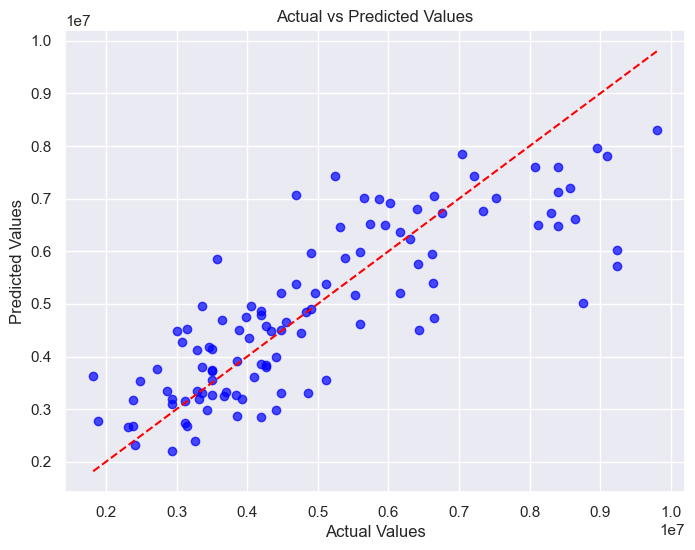

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#### Residual plot

<Figure size 800x600 with 0 Axes>

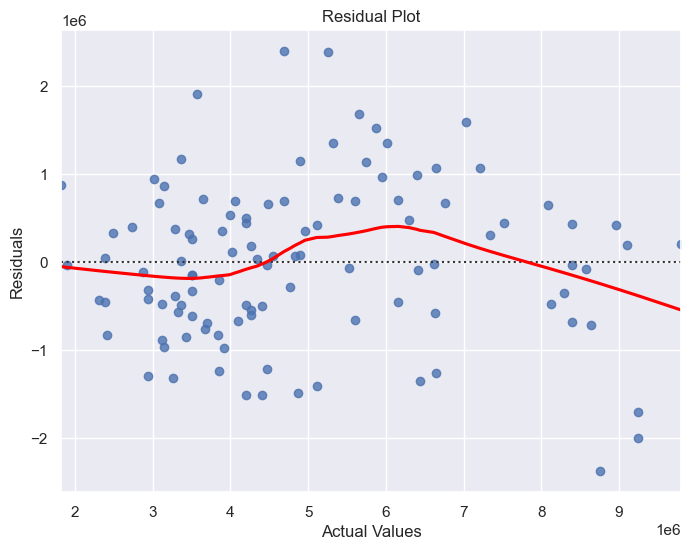

In [119]:
plt.figure(figsize=(8, 6))
sns.residplot(x=Y_test, y=Y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()